In [6]:
import pandas as pd

# Load the Rolling Stones Spotify dataset
file_path = 'rolling_stones_spotify.csv'
spotify_data = pd.read_csv(file_path)

# Perform initial data inspection
inspection_summary = {
    "Shape of data": spotify_data.shape,
    "Columns": list(spotify_data.columns),
    "Data types": spotify_data.dtypes.to_dict(),
    "Missing values": spotify_data.isnull().sum().to_dict(),
    "Duplicate rows": spotify_data.duplicated().sum(),
}

inspection_summary

{'Shape of data': (1610, 18),
 'Columns': ['Unnamed: 0',
  'name',
  'album',
  'release_date',
  'track_number',
  'id',
  'uri',
  'acousticness',
  'danceability',
  'energy',
  'instrumentalness',
  'liveness',
  'loudness',
  'speechiness',
  'tempo',
  'valence',
  'popularity',
  'duration_ms'],
 'Data types': {'Unnamed: 0': dtype('int64'),
  'name': dtype('O'),
  'album': dtype('O'),
  'release_date': dtype('O'),
  'track_number': dtype('int64'),
  'id': dtype('O'),
  'uri': dtype('O'),
  'acousticness': dtype('float64'),
  'danceability': dtype('float64'),
  'energy': dtype('float64'),
  'instrumentalness': dtype('float64'),
  'liveness': dtype('float64'),
  'loudness': dtype('float64'),
  'speechiness': dtype('float64'),
  'tempo': dtype('float64'),
  'valence': dtype('float64'),
  'popularity': dtype('int64'),
  'duration_ms': dtype('int64')},
 'Missing values': {'Unnamed: 0': 0,
  'name': 0,
  'album': 0,
  'release_date': 0,
  'track_number': 0,
  'id': 0,
  'uri': 0,
  'a

In [7]:
# Drop the unnecessary 'Unnamed: 0' column
spotify_data = spotify_data.drop(columns=['Unnamed: 0'])

# Describe the numerical columns for statistical insights
numerical_description = spotify_data.describe()

# Check for outliers using interquartile range (IQR) for a few key numerical columns
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Columns to check for outliers
columns_to_check = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                    'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

outlier_counts = {col: len(detect_outliers_iqr(spotify_data, col)) for col in columns_to_check}

numerical_description, outlier_counts


(       track_number  acousticness  danceability       energy  \
 count   1610.000000   1610.000000   1610.000000  1610.000000   
 mean       8.613665      0.250475      0.468860     0.792352   
 std        6.560220      0.227397      0.141775     0.179886   
 min        1.000000      0.000009      0.104000     0.141000   
 25%        4.000000      0.058350      0.362250     0.674000   
 50%        7.000000      0.183000      0.458000     0.848500   
 75%       11.000000      0.403750      0.578000     0.945000   
 max       47.000000      0.994000      0.887000     0.999000   
 
        instrumentalness    liveness     loudness  speechiness        tempo  \
 count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
 mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
 std            0.276249     0.34910     2.994003     0.051631    29.233483   
 min            0.000000     0.02190   -24.408000     0.023200    46.525000   
 25%            0.

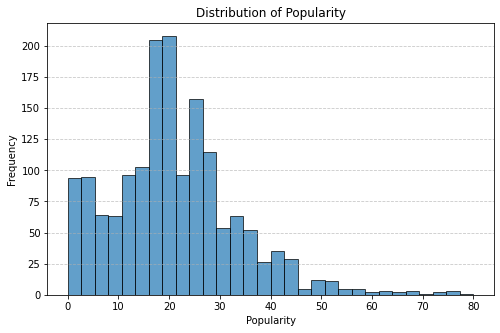

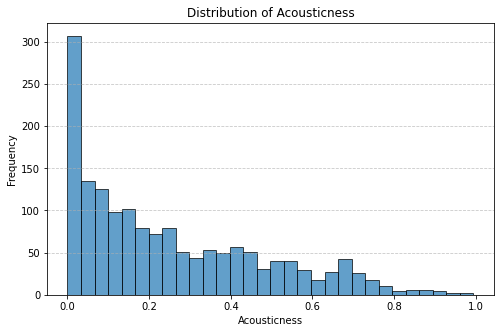

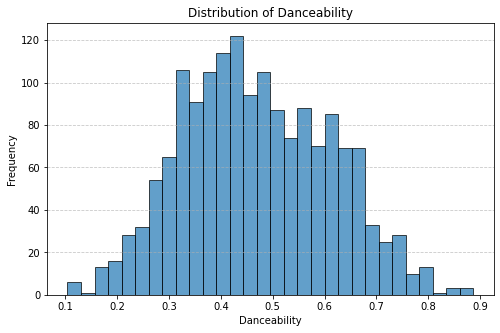

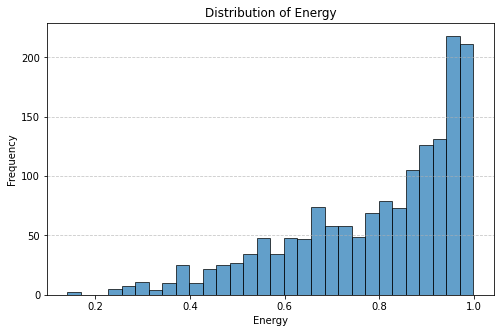

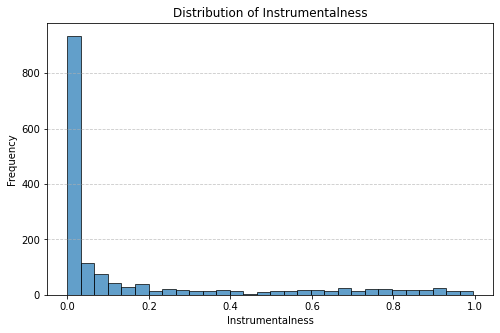

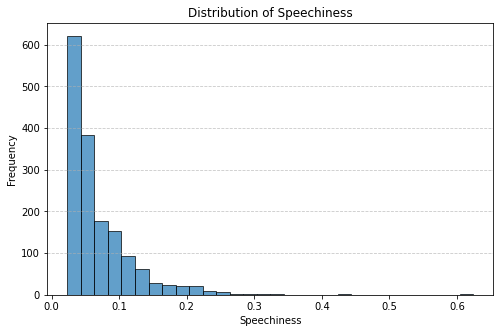

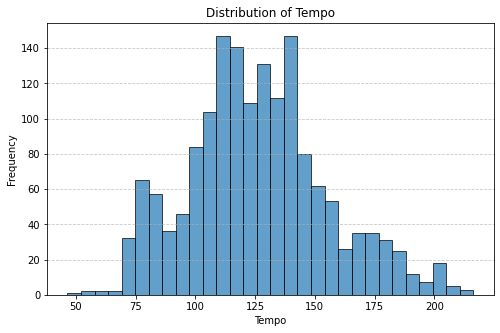

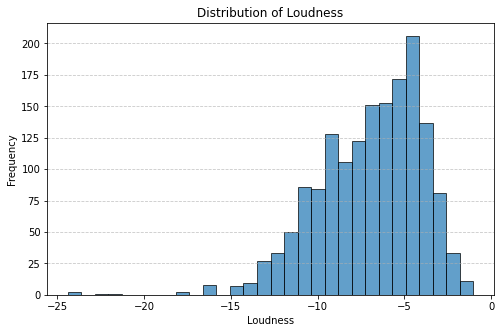

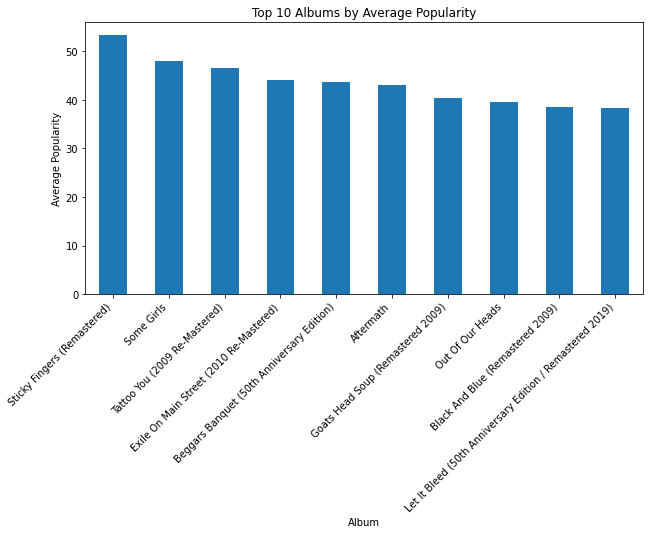

In [8]:
import matplotlib.pyplot as plt

# Define features to visualize
features_to_plot = ['popularity', 'acousticness', 'danceability', 'energy', 
                    'instrumentalness', 'speechiness', 'tempo', 'loudness']

# Plot histograms for numerical features
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    plt.hist(spotify_data[feature], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Visualize popularity vs. album to identify patterns
popular_albums = spotify_data.groupby('album')['popularity'].mean().sort_values(ascending=False).head(10)
popular_albums.plot(kind='bar', figsize=(10, 5), title='Top 10 Albums by Average Popularity', ylabel='Average Popularity', xlabel='Album')
plt.xticks(rotation=45, ha='right')
plt.show()


/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

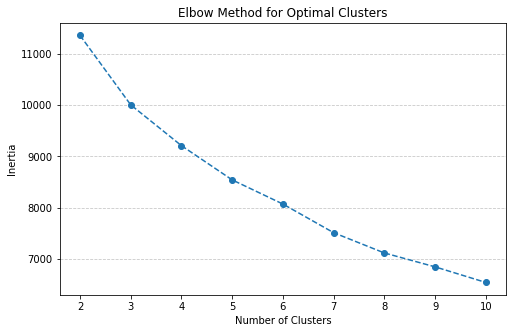

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

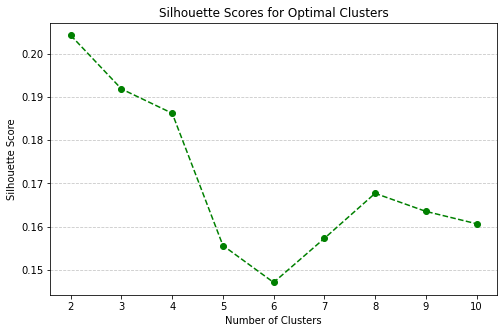

(2, 2)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Select features for clustering
clustering_features = spotify_data[['acousticness', 'danceability', 'energy', 
                                     'instrumentalness', 'liveness', 'speechiness', 
                                     'tempo', 'valence', 'popularity']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
range_clusters = range(2, 11)  # Testing for 2 to 10 clusters

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Evaluate silhouette scores for additional validation
silhouette_scores = []
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, cluster_labels))

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--', color='green')
plt.title('Silhouette Scores for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Provide the user with insights from these plots
optimal_clusters_elbow = np.argmin(np.diff(inertia)) + 2  # Estimate based on the elbow point
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2
optimal_clusters_elbow, optimal_clusters_silhouette


/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

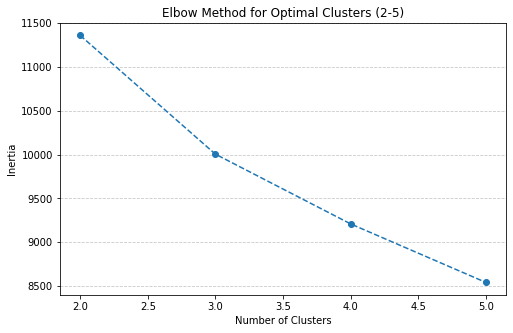

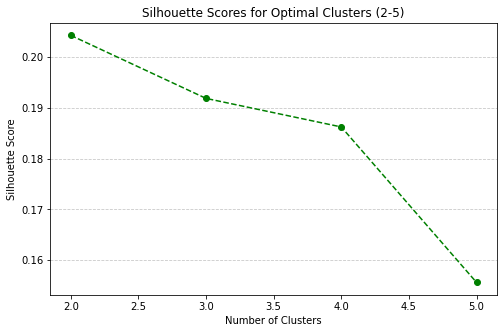

(2, 2)

In [11]:
# Adjusting the range for cluster evaluation to expedite the process
range_clusters = range(2, 6)  # Narrowing down to 2 to 5 clusters

# Recalculate inertia and silhouette scores for this range
inertia = []
silhouette_scores = []

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, cluster_labels))

# Plot the updated Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters (2-5)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot the updated Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--', color='green')
plt.title('Silhouette Scores for Optimal Clusters (2-5)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Identify optimal clusters based on silhouette scores and elbow point
optimal_clusters_elbow = np.argmin(np.diff(inertia)) + 2
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2
optimal_clusters_elbow, optimal_clusters_silhouette


In [12]:
# Perform K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
spotify_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze cluster characteristics by averaging features within each cluster
cluster_analysis = spotify_data.groupby('Cluster')[clustering_features.columns].mean()

# Display the cluster characteristics as a DataFrame
cluster_analysis

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,popularity
Cluster,,,,,,,,,
0,0.194696,0.364016,0.907947,0.161424,0.806750,0.101430,136.064264,0.461165,17.068249
1,0.290640,0.544356,0.709114,0.166147,0.264888,0.046529,118.893973,0.669296,23.466880


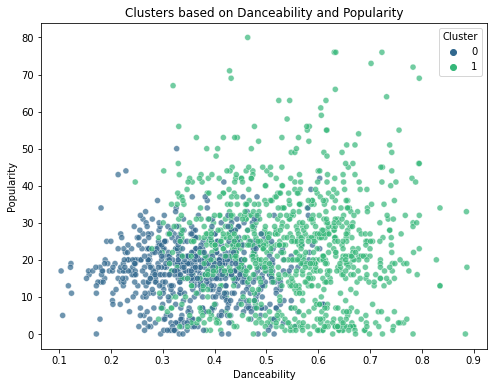

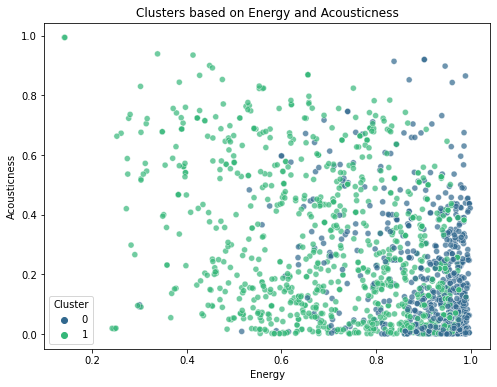

In [13]:
import seaborn as sns

# Create scatter plots to visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=spotify_data, x='danceability', y='popularity', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Clusters based on Danceability and Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=spotify_data, x='energy', y='acousticness', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Clusters based on Energy and Acousticness')
plt.xlabel('Energy')
plt.ylabel('Acousticness')
plt.legend(title='Cluster')
plt.show()

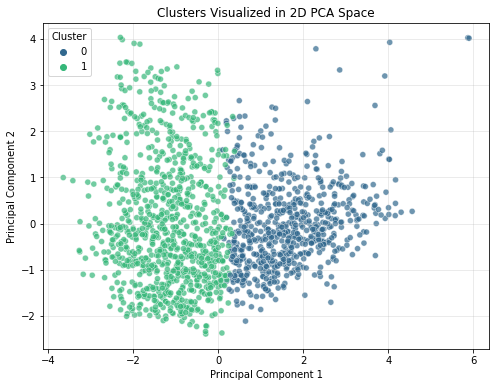

In [14]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
spotify_data['PCA1'] = reduced_features[:, 0]
spotify_data['PCA2'] = reduced_features[:, 1]

# Plot the clusters in the 2D PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(data=spotify_data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Clusters Visualized in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(alpha=0.3)
plt.show()


In [15]:
# Compute the Silhouette Score for the current clustering
silhouette_avg = silhouette_score(scaled_features, spotify_data['Cluster'])

silhouette_avg


0.20430510962046508